[YYYYMMDD]

# 2. Model 4

autoarima seasonal

## Goal
Find patterns on the features for target

## Plan
Checklist what will be done on the notebook :

        [ ] Get Data
        [ ] Modelling
                [ ] Hyper Parameter Tuning
                [ ] Feature selection (could be done with different notebook)
        [ ] Evaluation

In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib
import pmdarima
import sys
sys.path.insert(1,'../../src/')

## import myfunc inside src folder
from ramal import eval_model

In [2]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

PATH_RAW = config['path']['raw']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
# PATH_MODEL = config['path']['artifact']+os.getcwd().split('\\')[-1]+'/'
PATH_MODEL = config['path']['artifact']+'iteration_1'+'/'
PATH_UDF = config['path']['udf']

## Get Data

In [3]:
ts2 = joblib.load(PATH_MODEL+'ramal_1-92.pkl')

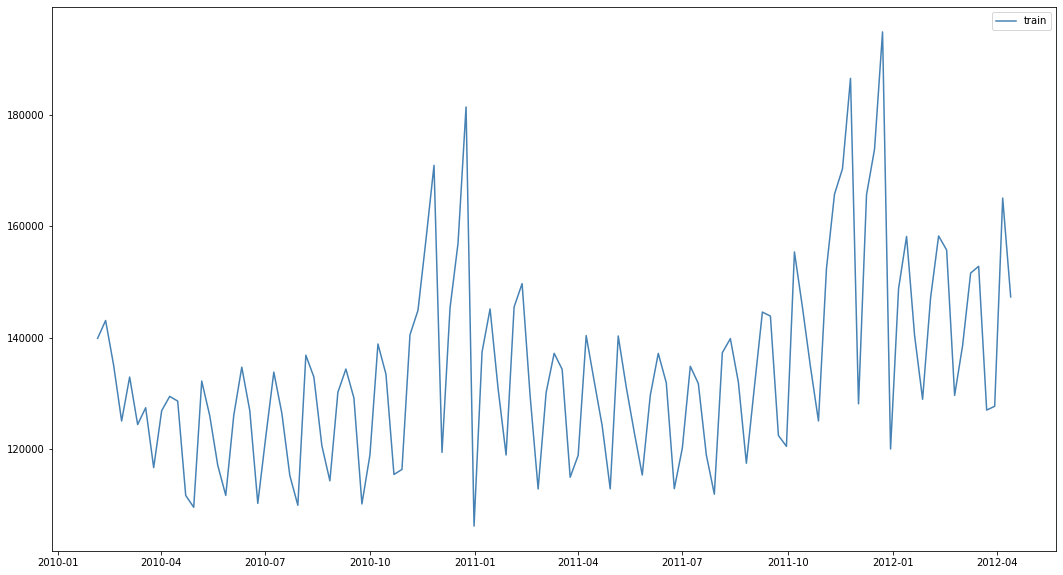

In [4]:
ts2.plot()

## Model 1

In [11]:
arima_model1 = pmdarima.arima.auto_arima(ts2.data, d = 1, max_d = 2
                         ,start_p = 0, max_p = 4
                         ,start_q = 0, max_q = 4
                         ,D = 1, max_D = 3
                         ,start_P = 0, max_P = 4
                         ,start_Q = 0, max_Q = 4
                         ,m = 5
                         ,seasonal = True
                         ,startionary = False
                         ,stepwise = False
                         ,trace = True
                         ,n_jobs = 5
                         ,random = True
                         ,n_fits = 120)


/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)



Best model:  ARIMA(4,1,0)(0,1,1)[5]          
Total fit time: 7.298 seconds


In [12]:
arima_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  115
Model:             SARIMAX(4, 1, 0)x(0, 1, [1], 5)   Log Likelihood               -1216.457
Date:                             Thu, 25 Aug 2022   AIC                           2444.915
Time:                                     13:31:52   BIC                           2461.063
Sample:                                          0   HQIC                          2451.463
                                             - 115                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3408      0.070     -4.848      0.000      -0.479      -0.203
ar.L2         -0.3575      0.092     -3.882      0.000      -0.538      -0.177
ar.L3         -0.2969      0.079     -3.758      0.000      -0.452      -0.142
ar.L4          0.2699      0.085      3.178      0.001       0.103       0.436
ma.S.L5       -0.7639      0.087     -8.733      0.000      -0.935      -0.592
sigma2      2.951e+08   5.34e-11   5.53e+18      0.000    2.95e+08    2.95e+08
===================================================================================
Ljung-Box (L1) (Q):                   4.98   Jarque-Bera (JB):                17.90
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.86
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

## Eval

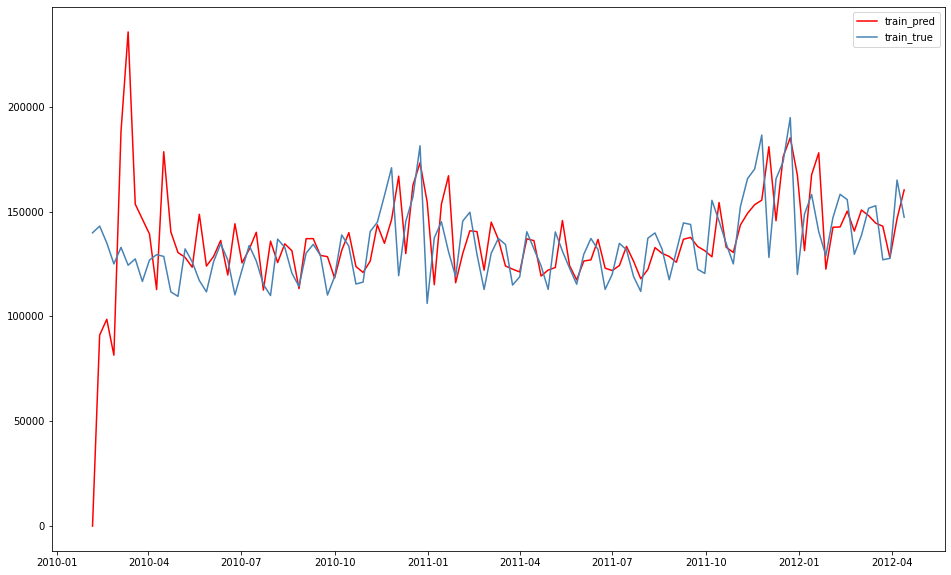

In [13]:
df_data_train = ts2.data
df_train_pred = pd.Series(arima_model1.predict_in_sample(), index = df_data_train.index)

## in sample
plt.figure(figsize=(16,10))
plt.plot(df_train_pred, label='train_pred', color='red')
plt.plot(ts2.data, label='train_true', color='steelblue')
plt.legend()

In [14]:
eval_model(ts2.data_1d()[5:], df_train_pred[5:])

{'MAE': 13379.631053505198,
 'MAPE': 0.10251179426582516,
 'MSE': 403166937.99839354,
 'over_est_0': 0.5363636363636364,
 'under_est_0': 0.4636363636363636,
 'R2': -0.2989809850425511}

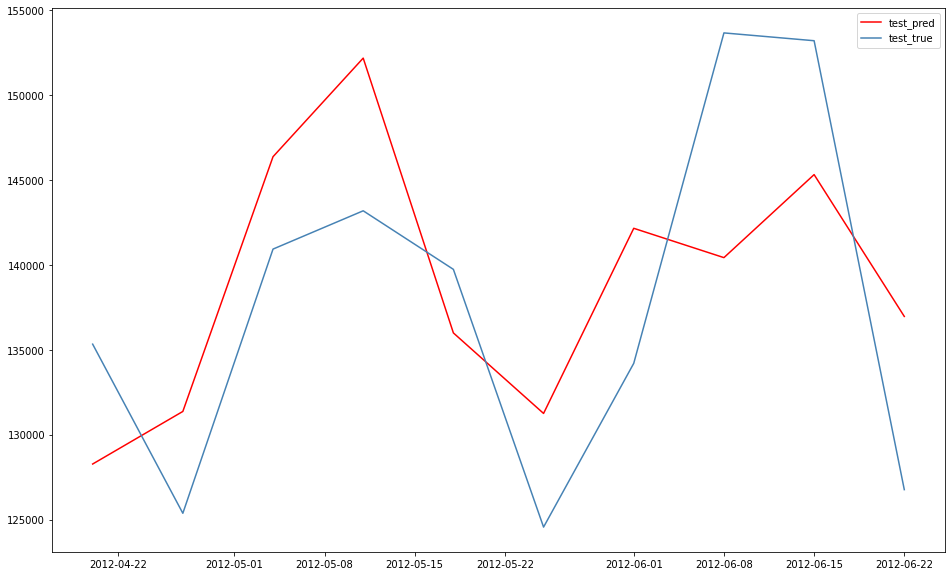

In [15]:
n_test = 10

df_data_test = ts2.data_test[:n_test]
df_test_pred = pd.Series(arima_model1.predict(n_periods=len(df_data_test)), index = df_data_test.index)

## in sample
plt.figure(figsize=(16,10))
plt.plot(df_test_pred, label='test_pred', color='red')
plt.plot(df_data_test,label='test_true', color='steelblue')
plt.legend()

In [16]:
eval_model(ts2.data_1d(test = 1)[:n_test], df_test_pred)

{'MAE': 7723.932706563217,
 'MAPE': 0.0559523780557034,
 'MSE': 66039531.31432529,
 'over_est_0': 0.6,
 'under_est_0': 0.4,
 'R2': 0.3415797026402889}

 ARIMA(2,1,1)(0,1,1)[5]             : AIC=2469.968, Time=0.27 sec
 ARIMA(1,1,0)(3,1,1)[5]             : AIC=2494.365, Time=0.29 sec
 ARIMA(0,1,0)(0,1,3)[5]             : AIC=2495.800, Time=0.21 sec
 ARIMA(1,1,1)(0,1,1)[5]             : AIC=2479.675, Time=0.11 sec
 ARIMA(0,1,3)(0,1,2)[5]             : AIC=2488.275, Time=0.33 sec
 ARIMA(1,1,1)(1,1,0)[5]             : AIC=2507.546, Time=0.07 sec
 ARIMA(2,1,0)(1,1,1)[5]             : AIC=2477.940, Time=0.13 sec
 ARIMA(0,1,2)(1,1,2)[5]             : AIC=2489.262, Time=0.44 sec
 ARIMA(1,1,0)(1,1,2)[5]             : AIC=2494.447, Time=0.24 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=2508.737, Time=0.10 sec
 ARIMA(1,1,0)(4,1,0)[5]             : AIC=2504.015, Time=0.29 sec
 ARIMA(4,1,0)(0,1,0)[5]             : AIC=2484.691, Time=0.09 sec
 ARIMA(1,1,2)(1,1,0)[5]             : AIC=2498.977, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=2477.699, Time=0.08 sec
 ARIMA(0,1,2)(0,1,3)[5]             : AIC=2489.250, Time=0.36 sec
 ARIMA(3,1